# Part 1.1 Exploratory Data Analysis (English/Vietnamese)

## EDA on English dataset

In [1]:
from datasets import load_dataset
import pandas as pd

ds_fingpt = load_dataset("FinGPT/fingpt-sentiment-train")

print(ds_fingpt)
print(ds_fingpt["train"].features)
print(ds_fingpt["train"][0])

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 76772
    })
})
{'input': Value(dtype='string', id=None), 'output': Value(dtype='string', id=None), 'instruction': Value(dtype='string', id=None)}
{'input': 'Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Korea Hydro & Nuclear Power Co. .', 'output': 'neutral', 'instruction': 'What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.'}


In [2]:
# Some basic analysis
## total number of samples
print("Total # of samples:", len(ds_fingpt["train"]))
print("-" * 20)

## unique input counts
output_counts_fingpt = pd.Series(ds_fingpt["train"]["output"]).value_counts()
print("Output counts:")
print(output_counts_fingpt)
print("-" * 20)

## unique instruction counts
instr_counts_fingpt = pd.Series(ds_fingpt["train"]["instruction"]).value_counts()
print("Instruction counts:")
print(instr_counts_fingpt)
print("-" * 20)

## duplicates and missing outputs
df_fingpt = pd.DataFrame(ds_fingpt["train"])
print("English duplicates:", df_fingpt.duplicated(subset="input").sum())
print("English missing outputs:", df_fingpt["output"].isna().sum())
print("-" * 20)


Total # of samples: 76772
--------------------
Output counts:
neutral                29215
positive               21588
negative               11749
moderately positive     6163
moderately negative     2972
mildly positive         2548
mildly negative         2108
strong negative          218
strong positive          211
Name: count, dtype: int64
--------------------
Instruction counts:
What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.                                                                                         30699
What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.                                                                                          29889
What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.    16184
Name: count, dtype: int64
-----------------

In [3]:
# remove duplicates
df_fingpt = df_fingpt.drop_duplicates(subset="input")
# remove missing outputs
df_fingpt = df_fingpt.dropna(subset=["output"])

#check data after cleaning
print("After cleaning:")
print("Total # of samples:", len(df_fingpt))
print("English duplicates:", df_fingpt.duplicated(subset="input").sum())
print("English missing outputs:", df_fingpt["output"].isna().sum())

## unique input counts updated
output_counts_fingpt = pd.Series(df_fingpt["output"]).value_counts()
print("Output counts:")
print(output_counts_fingpt)
print("-" * 20)

## unique instruction counts updateds
instr_counts_fingpt = pd.Series(df_fingpt["instruction"]).value_counts()
print("Instruction counts:")
print(instr_counts_fingpt)
print("-" * 20)


After cleaning:
Total # of samples: 30235
English duplicates: 0
English missing outputs: 0
Output counts:
output
neutral                10362
moderately positive     6163
positive                3484
moderately negative     2972
mildly positive         2548
negative                2169
mildly negative         2108
strong negative          218
strong positive          211
Name: count, dtype: int64
--------------------
Instruction counts:
instruction
What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.    16184
What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.                                                                                         10068
What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.                                                                            

Categorical summaries:
         output                                        instruction
count     30235                                              30235
unique        9                                                  3
top     neutral  What is the sentiment of this news? Please cho...
freq      10362                                              16184

Text‐length descriptive statistics:
count    30235.000000
mean       135.434397
std         84.076006
min          2.000000
25%         75.000000
50%        119.000000
75%        170.000000
max       2107.000000
Name: length, dtype: float64


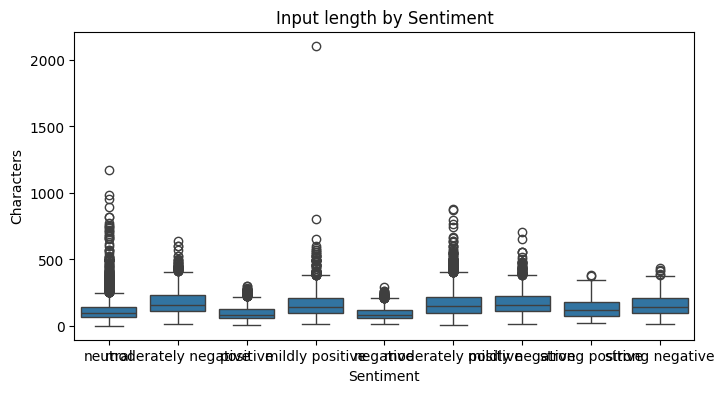

In [4]:
## standard descriptive statistics
import matplotlib.pyplot as plt
import seaborn as sns
print("Categorical summaries:")
print(df_fingpt[["output","instruction"]].describe())

## Numeric summary on text length
df_fingpt["length"] = df_fingpt["input"].str.len()
print("\nText‐length descriptive statistics:")
print(df_fingpt["length"].describe())

## Visualize length by sentiment
plt.figure(figsize=(8,4))
sns.boxplot(x="output", y="length", data=df_fingpt)
plt.title("Input length by Sentiment")
plt.ylabel("Characters"); plt.xlabel("Sentiment")
plt.show()

In [5]:
# taking a look at the first few rows of each type of questions in the instruction column
pd.set_option('display.max_colwidth', 200)

for instr in df_fingpt["instruction"].unique():
    print(f"Instruction: {instr}")
    print(df_fingpt[df_fingpt["instruction"] == instr].head(5))
    print("-" * 20)

Instruction: What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.
                                                                                                                                                                                                      input  \
0   Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Kore...   
1                                                                                                                                                 Sanofi poaches AstraZeneca scientist as new research head   
5                                                                                                                      The Finnish company Stockmann has signed the contract with the company Technopolis .   
9                                                                

In [6]:
# Text length analysis for English dataset
fingpt_text_lengths = [len(text) for text in df_fingpt["input"]]
print("English text length stats:")
print(pd.Series(fingpt_text_lengths).describe())

# Flag extremely short or long texts
short_threshold = 10 
long_threshold = 1000
print("\nPotential outliers in English dataset:")
print(f"Very short texts (<{short_threshold} chars): {sum(1 for l in fingpt_text_lengths if l < short_threshold)}")
print(f"Very long texts (>{long_threshold} chars): {sum(1 for l in fingpt_text_lengths if l > long_threshold)}")

English text length stats:
count    30235.000000
mean       135.434397
std         84.076006
min          2.000000
25%         75.000000
50%        119.000000
75%        170.000000
max       2107.000000
dtype: float64

Potential outliers in English dataset:
Very short texts (<10 chars): 26
Very long texts (>1000 chars): 2


In [7]:
# Word count analysis
df_fingpt["word_count"] = df_fingpt["input"].str.split().apply(len)
print("\nWord count descriptive statistics:")
print(df_fingpt["word_count"].describe())


Word count descriptive statistics:
count    30235.000000
mean        21.483281
std         13.564992
min          1.000000
25%         12.000000
50%         18.000000
75%         28.000000
max        303.000000
Name: word_count, dtype: float64


In [8]:
df_fingpt.head()

,input,output,instruction,length,word_count
0,"Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Kore...",neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,225,40
1,Sanofi poaches AstraZeneca scientist as new research head,neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,57,8
2,Starbucks says the workers violated safety policies while workers said they'd never heard of the policy before and are alleging retaliation.,moderately negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,140,21
3,$brcm raises revenue forecast,positive,What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.,29,4
4,"Google parent Alphabet Inc. reported revenue and earnings that fell short of analysts' expectations, showing the company's search advertising juggernaut was not immune to a slowdown in the digital...",moderately negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,237,37


In [9]:
import re
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grasshead/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# term frequency analysis
## preprocess to lowercase, remove punctuation, remove stopwords
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub('[^a-z A-Z 0-9-]+', '', text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df_fingpt["input_cleaned"] = df_fingpt["input"].apply(preprocess_text)
df_fingpt.head()

,input,output,instruction,length,word_count,input_cleaned
0,"Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Kore...",neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,225,40,teollisuuden voima oyj finnish utility known tvo said shortlisted mitsubishi heavy eu-apwr model along reactors areva toshiba corp ge hitachi nuclear energy korea hydro nuclear power co
1,Sanofi poaches AstraZeneca scientist as new research head,neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,57,8,sanofi poaches astrazeneca scientist new research head
2,Starbucks says the workers violated safety policies while workers said they'd never heard of the policy before and are alleging retaliation.,moderately negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,140,21,starbucks says workers violated safety policies workers said theyd never heard policy alleging retaliation
3,$brcm raises revenue forecast,positive,What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.,29,4,brcm raises revenue forecast
4,"Google parent Alphabet Inc. reported revenue and earnings that fell short of analysts' expectations, showing the company's search advertising juggernaut was not immune to a slowdown in the digital...",moderately negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,237,37,google parentalphabet increported revenue earnings fell short analysts expectations showing companys search advertising juggernaut immune slowdown digital ad market shares fell 6


In [11]:
def corpus(text):
    text_list = text.split()
    return text_list

df_fingpt["input_words_list"] = df_fingpt["input_cleaned"].apply(corpus)
df_fingpt.head()

,input,output,instruction,length,word_count,input_cleaned,input_words_list
0,"Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Kore...",neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,225,40,teollisuuden voima oyj finnish utility known tvo said shortlisted mitsubishi heavy eu-apwr model along reactors areva toshiba corp ge hitachi nuclear energy korea hydro nuclear power co,"[teollisuuden, voima, oyj, finnish, utility, known, tvo, said, shortlisted, mitsubishi, heavy, eu-apwr, model, along, reactors, areva, toshiba, corp, ge, hitachi, nuclear, energy, korea, hydro, nu..."
1,Sanofi poaches AstraZeneca scientist as new research head,neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,57,8,sanofi poaches astrazeneca scientist new research head,"[sanofi, poaches, astrazeneca, scientist, new, research, head]"
2,Starbucks says the workers violated safety policies while workers said they'd never heard of the policy before and are alleging retaliation.,moderately negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,140,21,starbucks says workers violated safety policies workers said theyd never heard policy alleging retaliation,"[starbucks, says, workers, violated, safety, policies, workers, said, theyd, never, heard, policy, alleging, retaliation]"
3,$brcm raises revenue forecast,positive,What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.,29,4,brcm raises revenue forecast,"[brcm, raises, revenue, forecast]"
4,"Google parent Alphabet Inc. reported revenue and earnings that fell short of analysts' expectations, showing the company's search advertising juggernaut was not immune to a slowdown in the digital...",moderately negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,237,37,google parentalphabet increported revenue earnings fell short analysts expectations showing companys search advertising juggernaut immune slowdown digital ad market shares fell 6,"[google, parentalphabet, increported, revenue, earnings, fell, short, analysts, expectations, showing, companys, search, advertising, juggernaut, immune, slowdown, digital, ad, market, shares, fel..."


In [12]:
from tqdm import trange

corpus = []

df_fingpt.reset_index(drop=True, inplace=True)

for i in trange(df_fingpt.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df_fingpt['input_words_list'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 30235/30235 [00:00<00:00, 362721.76it/s]


430921

In [13]:
from collections import Counter

mostCommon = Counter(corpus).most_common(10)
mostCommon

[('stock', 3962),
 ('stocks', 2871),
 ('company', 2443),
 ('-', 2348),
 ('market', 2284),
 ('inc', 2206),
 ('earnings', 2028),
 ('new', 2014),
 ('apple', 1980),
 ('investors', 1705)]

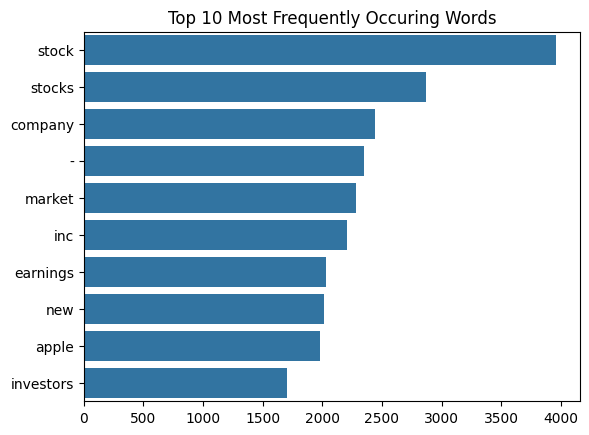

In [14]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
    
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

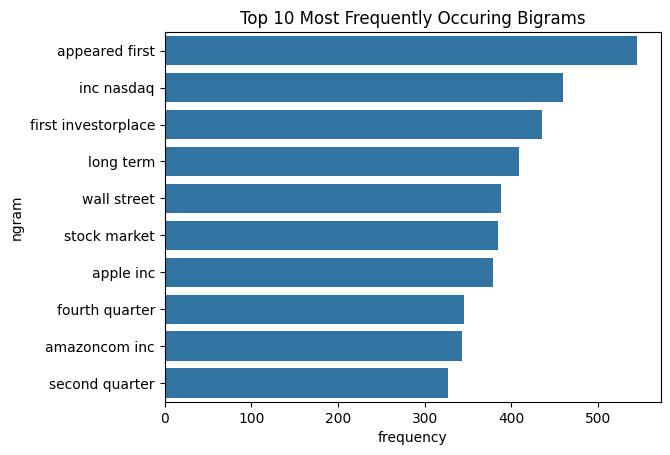

In [15]:
# Most frequent n-grams
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_fingpt['input_cleaned'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [16]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_fingpt['input_cleaned'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

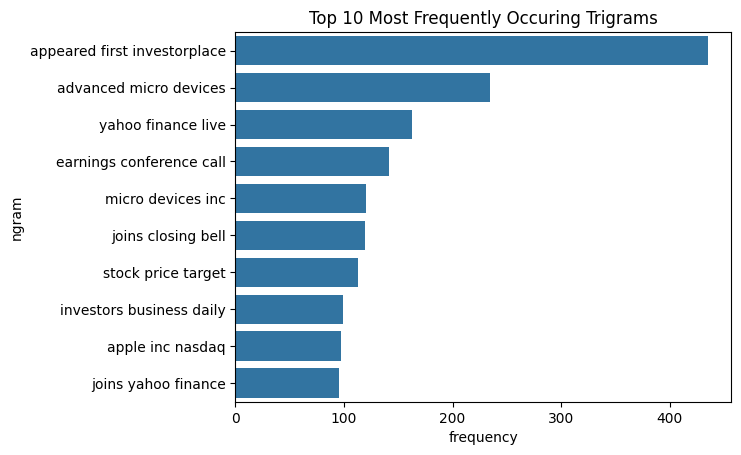

In [17]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

### Findings
1. Data set seems to have a large amount of duplicates but no missing values.
2. Data set seems to be split into 3 distinct questions asked, two of which is attempting to split the output into 3 categories which the last one splits it into 7 categories. 
3. After cleaning, there is now a less balanced dataset(10362 neutral making it rather dominant, 210-220 strong negative and positive making them underrepresented)
4. The are not a lot of outliers, and in general the dataset is about a sentence or two with the occasional outliers. The dataset seems to be right-skewed as seen by the mean being more than the median.



### Issues affecting Model Performance Potentially
1. Different instruction template especially with the varying sentiment granularity can cause unclear or biased objectives during training depending on how it is handled.
2. The several imbalance in class may cause insufficient representation in the other sentiments
3. some samples may not provide enough context along with it as the sentence length of the dataset is generally on the shorter side


## EDA on Vietnamese Dataset

In [18]:
ds_viet = load_dataset("uitnlp/vietnamese_students_feedback")

print(ds_viet)
print(ds_viet["train"].features)
print(ds_viet["train"][0])

DatasetDict({
    train: Dataset({
        features: ['sentence', 'sentiment', 'topic'],
        num_rows: 11426
    })
    validation: Dataset({
        features: ['sentence', 'sentiment', 'topic'],
        num_rows: 1583
    })
    test: Dataset({
        features: ['sentence', 'sentiment', 'topic'],
        num_rows: 3166
    })
})
{'sentence': Value(dtype='string', id=None), 'sentiment': ClassLabel(names=['negative', 'neutral', 'positive'], id=None), 'topic': ClassLabel(names=['lecturer', 'training_program', 'facility', 'others'], id=None)}
{'sentence': 'slide giáo trình đầy đủ .', 'sentiment': 2, 'topic': 1}


In [19]:
# some basic analysis
print("Total # of samples:", len(ds_viet["train"]))
print("-" * 20)

sentiment_counts_viet = pd.Series(ds_viet["train"]["sentiment"]).value_counts()
print("Sentiment counts:")
print(sentiment_counts_viet)
print("-" * 20)

topic_counts_viet = pd.Series(ds_viet["train"]["topic"]).value_counts()
print("Topic counts:")
print(topic_counts_viet)
print("-" * 20)

df_viet = pd.DataFrame(ds_viet["train"])
print("Vietnamese duplicates:", df_viet.duplicated(subset="sentence").sum())
print("Vietnamese missing sentiments/topics:", df_viet[["sentiment","topic"]].isna().sum())

Total # of samples: 11426
--------------------
Sentiment counts:
2    5643
0    5325
1     458
Name: count, dtype: int64
--------------------
Topic counts:
0    8166
1    2201
3     562
2     497
Name: count, dtype: int64
--------------------
Vietnamese duplicates: 1
Vietnamese missing sentiments/topics: sentiment    0
topic        0
dtype: int64


In [ ]:
 # mapping the numeric labels of sentiment and topic to their string representations
sentiment_mapping = {0: "negative", 1: "neutral", 2: "positive"}
topic_mapping = {0: "lecturer", 1: "trainin_program", 2: "facilty", 3: "others"}

In [20]:
# Text length analysis for Vietnamese dataset
viet_text_lengths = [len(text) for text in ds_viet["train"]["sentence"]]
print("\nVietnamese text length stats:")
print(pd.Series(viet_text_lengths).describe())



Vietnamese text length stats:
count    11426.000000
mean        59.084894
std         43.085202
min          4.000000
25%         31.000000
50%         47.000000
75%         73.000000
max        660.000000
dtype: float64
